In [ ]:
# Nama : Fakhrity Hikmawan
# NIM : 1103204074
# Kelas : TK-44-G4

In [ ]:
from google.colab import drive

# Mount Google Drive ke direktori yang bisa diakses oleh Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd  # Mengimpor library pandas dan memberikan alias sebagai pd

# Membaca file CSV dari Google Drive dan menyimpannya ke dalam variabel 'df'
df = pd.read_csv('/content/drive/MyDrive/DATASET/best-selling-books.csv')

# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [25]:
# Mengganti nama kolom 'Author(s)' menjadi 'Author' pada DataFrame 'df'
df.rename(columns={'Author(s)': 'Author'}, inplace=True)

# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa
print(df.head())

                                       Book                    Author  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                          200.0   
2           English             1997                          120.0   
3           English             1939                          100.0   
4           Chinese             1791                          100.0   

                Genre  
0  Historical fiction  
1             Novella  
2             Fantasy  
3             Mystery  
4         Fami

In [26]:
# Menghapus kolom 'Genre' dan 'Original language' dari DataFrame 'df'
df.drop(['Genre', 'Original language'], axis=1, inplace=True)

# Menampilkan beberapa baris pertama dari DataFrame untuk memeriksa
print(df.head())

                                       Book                    Author  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   

   First published  Approximate sales in millions  
0             1859                          200.0  
1             1943                          200.0  
2             1997                          120.0  
3             1939                          100.0  
4             1791                          100.0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

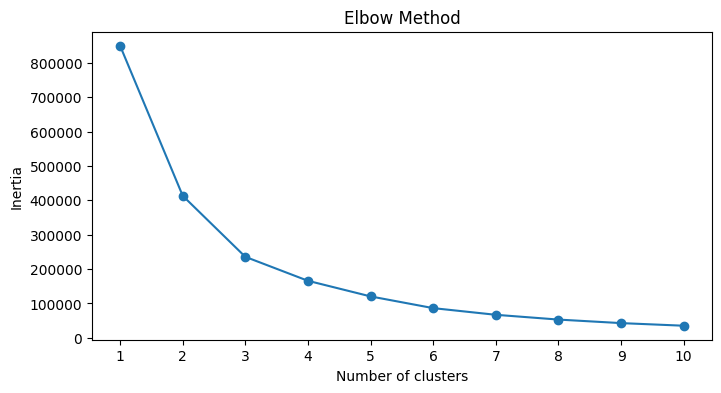

In [27]:
# Mengimpor library yang diperlukan untuk clustering dan visualisasi
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menyiapkan data untuk clustering, hanya menggunakan kolom 'First published' dan 'Approximate sales in millions'
X = df[['First published', 'Approximate sales in millions']]

# Menginisialisasi list untuk menyimpan nilai inersia untuk setiap nilai k
inertia = []

# Menghitung nilai inersia untuk k dari 1 hingga 10
for k in range(1, 11):
    # Membuat model KMeans dengan k klaster
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fitting model KMeans pada data X
    kmeans.fit(X)
    # Menambahkan nilai inersia (within-cluster sum-of-squares) ke dalam list
    inertia.append(kmeans.inertia_)

# Membuat plot untuk metode elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


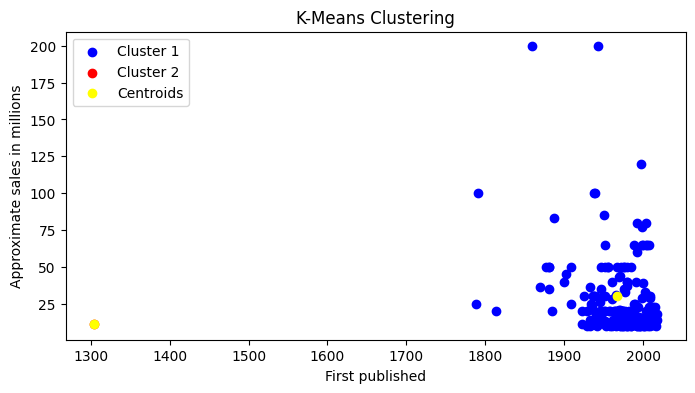

In [29]:
# Membuat model k-means dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
# Menyesuaikan model pada data X dan memprediksi label cluster untuk setiap sampel
df['label'] = kmeans.fit_predict(X)

# Membuat plot visualisasi hasil clustering berdasarkan label
plt.figure(figsize=(8, 4))
# Memplot sampel dengan label 0
plt.scatter(df[df['label'] == 0]['First published'], df[df['label'] == 0]['Approximate sales in millions'], c='blue', label='Cluster 1')
# Memplot sampel dengan label 1
plt.scatter(df[df['label'] == 1]['First published'], df[df['label'] == 1]['Approximate sales in millions'], c='red', label='Cluster 2')
# Menampilkan centroid dari masing-masing cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('First published')
plt.ylabel('Approximate sales in millions')
plt.legend()
plt.show()


In [34]:
# Mengimpor library yang dibutuhkan
from sklearn.metrics import silhouette_score

# Membuat dictionary untuk menyimpan nilai Silhouette Scores
silhouette_scores = {}

# Menghitung Silhouette Score untuk k dari 2 hingga 10
for k in range(2, 11):
    # Membuat dan menyesuaikan model KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # Menghitung Silhouette Score dan menyimpannya dalam dictionary
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores[k] = score
    # Mencetak nilai Silhouette Score
    print(f"Silhouette Score for k={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.9112751030766804
Silhouette Score for k=3: 0.6194544295250444
Silhouette Score for k=4: 0.388308007937828


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=5: 0.41105757585547675
Silhouette Score for k=6: 0.4576353730994602


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.4646298202860503
Silhouette Score for k=8: 0.41768743953442933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=9: 0.43786740246054595


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.4729273413712544


In [35]:
# Mengimpor library yang dibutuhkan untuk clustering dan menghitung DBI
from sklearn.metrics import davies_bouldin_score

# Membuat dictionary untuk menyimpan nilai DBI untuk setiap nilai k
dbi_scores = {}

# Menghitung DBI untuk setiap k dari 2 hingga 10
for k in range(2, 11):
    # Membuat model KMeans dengan jumlah cluster sebanyak k
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # Menghitung nilai DBI dan menyimpannya dalam dictionary
    dbi = davies_bouldin_score(X, kmeans.labels_)
    dbi_scores[k] = dbi
    # Mencetak nilai DBI untuk setiap k
    print(f"Davies-Bouldin Index for k={k}: {dbi}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.057257948005993514
Davies-Bouldin Index for k=3: 0.5717669202487764
Davies-Bouldin Index for k=4: 0.7050145599632723
Davies-Bouldin Index for k=5: 0.7145110320319411
Davies-Bouldin Index for k=6: 0.6016686244941515
Davies-Bouldin Index for k=7: 0.5891284756888153
Davies-Bouldin Index for k=8: 0.6005363222757863
Davies-Bouldin Index for k=9: 0.6287523627999244


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for k=10: 0.5573715322625239


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Mengimpor modul yang diperlukan untuk clustering dan menghitung Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score

# Membuat dictionary untuk menyimpan nilai Calinski-Harabasz Index untuk setiap nilai k
calinski_harabasz_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap k dari 2 hingga 10
for k in range(2, 11):
    # Membuat model KMeans dengan jumlah cluster k
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # Menghitung nilai Calinski-Harabasz Index dan menyimpannya dalam dictionary
    ch_score = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz_scores[k] = ch_score
    # Mencetak nilai Calinski-Harabasz Index untuk setiap k
    print(f"Calinski-Harabasz Index for k={k}: {ch_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index for k=2: 181.66245765992528
Calinski-Harabasz Index for k=3: 222.9035147147288
Calinski-Harabasz Index for k=4: 233.64723130524501
Calinski-Harabasz Index for k=5: 254.982240104343


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index for k=6: 297.23559885538083
Calinski-Harabasz Index for k=7: 325.4741072476442
Calinski-Harabasz Index for k=8: 356.07847243943286
Calinski-Harabasz Index for k=9: 376.4675952978705
Calinski-Harabasz Index for k=10: 422.0362519437028


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
